<h1 style="font-family:verdana;"> <center>Mastering Pandas: 25 Tip and Tricks for Efficient Data Analysis</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Let's Start</center></p>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 This notebook is intended for mastering the pandas library, and I will not be solving any machine learning problems in this notebook</p></blockquote>

In [2]:
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
df_train=pd.read_csv(r'/kaggle/input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Using Indexing to Ensure CSV Output Does Not Contain Extra Columns

*When you're new to a library like Pandas, it's common to make mistakes in your code. One such mistake is writing to a CSV file with an unnecessary index. This often happens when the index of a Pandas DataFrame contains no useful information, but is included by default when writing to a CSV file. This results in an additional column in the CSV file that is not needed and can cause issues when the file is read back in. To avoid this mistake, make sure to exclude the index column when writing to a CSV file, unless it contains valuable information that needs to be preserved.*

In [8]:
df_train.to_csv("csv_file.csv", index=False)
print("saved without indexing")

saved without indexing


## 2. Don't Avoid Spaces in Column Names
*Another mistake is using column names that include spaces. While this may seem like a good idea at first glance, it can lead to several issues, including losing the ability to access the column using dot syntax. Instead, it is preferable to use underscores in place of spaces when naming columns. By doing so, you can easily access the column using dot syntax, making querying these columns much easier.*

In [17]:
df_train["new_column"]=df_train.Name.str[-2:-1]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_column
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,i
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,r
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,l
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,r


## 3. Maximizing Your Data Filtering Capabilities with the 'Query' Method
*Many users do not realize the full potential of the 'query' method for filtering their data frames. While there is nothing inherently wrong with the syntax used here, the 'query' method can be a powerful tool for creating complex queries. This feature becomes particularly useful as the query criteria becomes more intricate.*

In [20]:
df_filter_q = df_train.query('Sex=="female"')
df_filter_q.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_column
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,r
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,l
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,g
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,m


## 4. Efficient Querying with variables
*When formulating queries with string methods, it's common to have a variable that you want to query on multiple times. Traditionally, one would create these string queries manually using f-strings or concatenating strings. However, this is not necessary when using Pandas queries, which can access external variables by using the at symbol before the variable name.*

In [21]:
female_variable="female"
df_filter_v = df_train.query('Sex==@female_variable')
df_filter_v.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_column
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,r
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,l
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,g
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,m


## 5. The Problem with 'inplace=True'"
*Using the "inplace=True" option can be confusing for new users, as many built-in methods like "fillna" and "reset_index" have this option. Setting "inplace=True" will overwrite the data frame with the changes, but this approach is generally not recommended. In fact, the pandas core developers plan to remove this functionality altogether. Instead, it's better to explicitly overwrite the original data frame with the modified version to ensure that your code is more readable, less error-prone, and easier to maintain.*

In [26]:
#df_train.fillna(0,inplace=True)
#df_train.reset_index(inplace=True)
print("before ", df_train.isna().value_counts())

df_train=df_train.fillna(0)
df_train=df_train.reset_index()

print("After ", df_train.isna().value_counts())

before  PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64
After  index  PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False  False        False     False   False  False  False  False  False  False   False  False  False       891
dtype: int64


## 6. Avoiding Row Iteration and Using Vectorized Functions

*Iterating over rows in a pandas DataFrame is a common mistake that many new users make, especially when dealing with large datasets. For example, if we want to identify rows with a age greater than 25, we may be tempted to iterate over each row and check the year value. However, this approach can be slow and inefficient.*

*A better approach is to use vectorized functions, which can apply operations to entire columns of data at once. In this case, we can use the greater than operator to compare the Age column to 25 and generate a boolean mask indicating which rows meet the condition. This mask can then be stored as a result and used for further analysis or filtering. By avoiding row iteration and using vectorization, we can achieve faster and more efficient data processing.*


In [28]:
'''
for i, row in df_train.interrows():
    if row['Age']>25:
        df_train.loc[i, 'is_recent']=True
    else:
        df_train.loc[i, 'is_recent']=True
'''
df_train['is_recent']=df_train['Age']>25
df_train.is_recent.value_counts()

False    478
True     413
Name: is_recent, dtype: int64

## 7. Vectorization and the Apply Method
*When vectorization is an option, using the apply method allows you to apply any function across an axis of your data frame. This is often better than iterating over each row in the data frame. However, it is still preferable to use vectorized functions when possible.*

*For instance, consider the following scenario where we want to create a new column that squares the age value. We can use the apply method to apply the square function to each row in the data frame. However, a better option would be to use a vectorized function and apply it to the entire array. This not only results in cleaner code, but also improves the performance of the operation.*


In [31]:
'''
df_train['Age_squared']=df_train.apply(lambda row: row['Age']**2, axis=1)
'''

df_train['Age_squared']=df_train['Age']**2
df_train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_recent,Age_squared
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,False,484.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1444.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,True,676.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1225.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,True,1225.0


## 8. Understanding the Difference Between Slices and Copies
*When working with data frames in Pandas, it's important to understand how to create new data frames based on subsets of your original data. In one example, we filtered our data frame for times under 10 and stored it as a new data frame called "DF_fast". However, we received a warning when we tried to modify this new data frame, because our modifications were actually being applied to a slice of the original data frame. To avoid this issue, it's best to use the "copy" method when creating a new data frame based on a subset of your initial data frame. By default, this method creates a deep copy, which means that any edits you make to your new data frame will not affect the original data frame.*

In [35]:
'''Slice
DF_fast=df_train.query("Sex=='female'")
DF_fast['first_name']=DF_fast['Name'].str[-8:]
DF_fast.head()
'''
#copy
DF_fast=df_train.query("Sex=='female'").copy()
DF_fast['first_name']=DF_fast['Name'].str[-8:-1]
DF_fast.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_recent,Age_squared,first_name
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1444.0,Thayer
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,True,676.0,s. Lain
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1225.0,ay Peel
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,True,729.0,na Berg
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C,False,196.0,e Achem


## 9. Improving Data Transformation Efficiency and Readability with Chaining Commands
*When working with transformations in data analysis, it's common to see code where each step of the process is written to a new data frame variable, resulting in multiple intermediate data frames. However, this approach has several drawbacks and is not considered ideal. Instead, it's encouraged to use chaining commands, where all the transformations are applied once in a single line of code. This approach has several advantages, including improved readability, reduced memory usage, and better performance. By using chaining commands, you can streamline your data analysis workflow and produce cleaner, more efficient code.*

In [11]:
'''df1=df_train.query('Age>25.0')
df2=df1.groupby(['Sex']).min()
df_output = df2.sort_values('Age')
df_output'''

df_output=(df_train.query('Age>25.0')
           .groupby(['Age']).min()
           .sort_values('Age')
          )
df_output

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  import sys


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Age,,,,,,,,,
26.0,3,0,1,"Adams, Mr. John",female,0,0,111369,7.7750
27.0,9,0,1,"Andersson, Mr. August Edvard (""Wennerstrom"")",female,0,0,113503,6.9750
28.0,24,0,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,0,0,110564,7.7958
28.5,58,0,3,"Novel, Mr. Mansouer",male,0,0,2697,7.2292
29.0,54,0,1,"Allen, Miss. Elisabeth Walton",female,0,0,113501,7.0458
30.0,80,0,1,"Abelson, Mr. Samuel",female,0,0,110152,7.2250
30.5,768,0,3,"Mangan, Miss. Mary",female,0,0,364499,7.7500
31.0,19,0,1,"Collyer, Mr. Harvey",female,0,0,17474,7.7500
32.0,71,0,1,"Backstrom, Mr. Karl Alfred",female,0,0,11813,7.7500


## 10. Importance of Properly Setting Data Types in Pandas
*When working with data frames in Pandas, it's important to ensure that each column is assigned the correct data type. When reading in data, Pandas will try to automatically parse the data types, but sometimes it may not be able to do so correctly. For example, in this data frame, the Age column is represented as an Float64 instead of a Int format. To fix this, we need to manually set the data type for this column.*

In [17]:
#before
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_train['Age']=df_train['Age'].apply("int64")
#after
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


## 11. Practices for Representing Binary Values
*In some cases when working with data frames in Pandas, it's better to represent binary values as Boolean values instead of strings. For example, if we create a new column called "sub_age" that contains the string "yes" when the Age value is greater than 25, it would be better to represent this value as a Boolean value (i.e., "True" or "False"). You can do this when you create the column, or you can use the "map" function to convert existing string values to Boolean values. This approach is more efficient and makes your code easier to read and understand.*

In [25]:
'''
df_train['sub_age']='NO'
df_train.loc[df_train['Age']>25,'sub_age']='YES'
df_train.head()
'''
df_train['sub_age']=df_train['Age']>25
df_train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sub_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,True


## 12.Taking Advantage of Built-In Plotting Methods
*When working with data frames in Pandas, it's important to take advantage of the built-in plotting methods that Pandas provides. Sometimes, you may find yourself in a situation where you need to quickly create a plot of your data. In the past, this might have involved creating a Matplotlib subplot and plotting the data manually. However, Pandas already has a lot of this functionality built into its "plot" method. By leveraging this method, you can quickly and easily create a wide range of plots and visualizations directly from your Pandas data frame.*

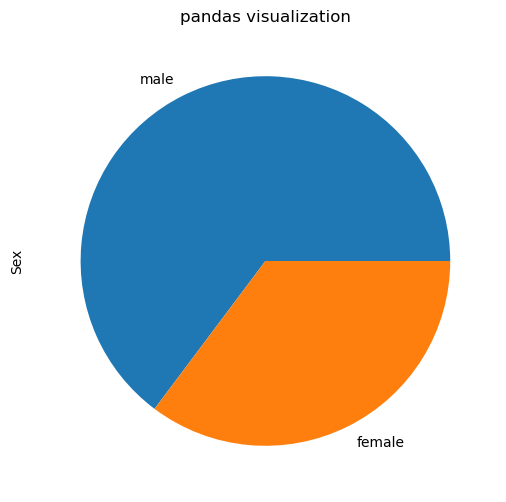

In [50]:
ax=df_train['Sex'].value_counts().plot(kind='pie', figsize=(6,6), title='pandas visualization')

## 13. Applying String Methods to Entire Columns at Once

*If you need to apply a string method like "uppercase" to a column that contains string values in Pandas, you might think you need to apply the method across the entire column manually. However, Windows actually provides string methods that allow you to apply any string method to the entire array at once. To do this, you can call the "str" method followed by your command, such as "upper", to apply the "uppercase" method to the entire array. This can save time and make your code more efficient.*

In [53]:
'''
df_train['Name_Uppercase'] = df_train['Sex'].apply(lambda x: str(x).upper())
'''
df_train['Name_Uppercase'] = df_train['Sex'].str.upper()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sub_age,Name_Uppercase
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,MALE
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,FEMALE
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,True,FEMALE
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,FEMALE
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,True,MALE


## 14. Use of functions 
*When working with data transformations in Pandas, it's common to perform the same set of operations on multiple data frames. However, repeating the same code for each data frame can be inefficient and hard to maintain. Instead, it's best practice to write a function for the data pipeline that you can apply to each data frame.*

## 15. Renaming Columns
*When working with data frames in Pandas, it's sometimes necessary to rename columns. One way to do this is to provide a list of new names for the columns you want to rename. However, a better and more efficient way to rename columns is to use the "rename" method and provide a dictionary with the old and new column names to the "columns" variable. This approach is preferred because it's cleaner and easier to read, especially when renaming multiple columns.*

## 16. Analyze Data by Specific Groups or Categories
*When working with data sets that have multiple groups, it can be useful to aggregate data within each group separately. For example, if we have a data set that includes both men's and women's race times, and we want to find the lowest time for each group, we can filter the data based on the grouping column and then calculate the minimum value for each group. This is exactly what the "group by" method in Pandas is designed for. By selecting a column or columns to group the data on, we can then perform any desired aggregations within each group independently.*

## 17. Calculate Summary Statistics over DataFrames
*In Pandas, you can use group by aggregations to calculate summary statistics over your data. However, some code examples may use a less efficient method of iterating over each row in the data frame and storing the results after each iteration. Instead, you can use the group by method to achieve the same results with simpler code. Grouping your data in this way also allows you to specify multiple ways to aggregate the data, such as calculating the mean and count. Additionally, you can use this method to calculate other summary statistics like the maximum, minimum, and standard deviation.*

## 18.Using Built-In Methods Instead of Loops.
*it's common to need to calculate changes in values across a data frame. In one example, we used a loop to calculate the percent change and difference between the time columns in each row of the data frame. However, there's actually a built-in function in Pandas for performing these types of calculations. You can use the "percent change" and "diff" methods to easily calculate changes in a Panda series. This can be a more efficient and less error-prone way to perform these types of calculations compared to using a loop.*

## 19. Efficient Data Storage
*As you work with data sets in Pandas, you may reach a point where you need to save your data to disk. While CSV is a common file format for data storage, it can be very slow and take up a lot of space, especially for large data sets. Luckily, Pandas provides built-in methods for saving data to many different file types, including parquet, feather, and pickle files. These file formats also retain the data types of your data frame, which means you don't have to manually set them again when you read in the file. This can save you time and hassle when working with large or complex data sets.*

## 20. Built-in Styling Capabilities for Conditional Formatting
*Conditional formatting is a common task when working with data, and many new Pandas users may find themselves switching back to Excel to accomplish it. However, Pandas data frames actually have a built-in "style" attribute that allows for extensive formatting of your data when you display it as HTML. This type of styling can be very powerful and covers almost anything you might want to do in Excel. By using Pandas' built-in styling capabilities, you can streamline your workflow and avoid the need to switch back and forth between different programs.*

## 21. Handle Column Names That Appear in Both Data Frames.
*When merging two data frames in Pandas, it's important to be aware of how column names are handled, especially for columns that appear in both data frames but are not used for merging. By default, these columns are given the suffixes "_x" and "_y" in the merged data frame. To avoid confusion and make it easier to track these columns later on in your data processing, it's recommended to explicitly state the suffixes when merging the data frames. This allows you to choose more meaningful suffixes that are relevant to your specific data and analysis. By doing so, you can create a cleaner, more organized data frame that's easier to work with.*

## 22. Tips for Ensuring a One-to-One Match
*When you merge two data frames in Pandas, it's important to confirm that the merge is a one-to-one match. One way to do this is by comparing the lengths of the merged data frame with the initial data frames. To simplify this process, Pandas has a "validate" parameter that automatically checks for different merge types. If the validation fails, this will throw a merge error. This can help you identify any issues with your merge and ensure that your data is merged correctly.*

## 23. Improving Code Readability
*In Pandas, method chaining is a powerful tool that can help you write more efficient and concise code. However, chaining multiple commands together in one line can make your code difficult to read and understand. To improve readability, you can split your chained expression into multiple lines by wrapping it in parentheses. This allows you to separate each component of the expression onto its own line, making the code much easier to follow and comprehend.*

## 24.Improve Performance and Memory Usage
*When working with data in Pandas, it's important to use the appropriate data types to optimize performance and memory usage. In one example, we had a grouping column with only two possible values. Instead of storing this column as a string object, it's better to store it as a categorical data type. Categorical data types take up less space in memory and can make operations much faster on large data sets. By using the categorical data type, you can improve the efficiency and speed of your data analysis.*

## 25. Avoiding Duplicated Columns When Concatenating Data Frames
*When you concatenate two data frames in Pandas, you may end up with duplicated columns in your resulting data frame. This can be confusing and difficult to debug if you're not aware that it's possible. However, there is a flag in Pandas that can be set to alert you when duplicate labels occur. Alternatively, you can use a line of code to check for and remove any duplicated columns in your data frame. It's important to be aware of this issue when working with Pandas to avoid errors and ensure the accuracy of your analyses.*

*If you notice any mistakes or have any questions, please leave a comment below and don't forget to  UPVOTE. follow for more helpful tips and tutorials. Thanks for reading!*